## Image Processing: 101

Image Processing Basic with OpenCV

- [Arithmetic Operations](#Arithmetic-Operations)
- [Bitwise Operations](#Bitwise-Operations)
- [Color Mapping](#Color-Mapping)
- [Thresholding Image](#Thresholding-Image)
- [Blending and Pasting Image](#Blending-and-Pasting-Image)
- [Blurring and Smoothing Image](#Blurring-and-Smoothing---Denoising-Image)
- [Image Gradients](#Image-Gradients)
- [Image Histogram](#Image-Histogram)
    - [Histogram Equalization](Histogram-Equalization)
- [Image Rotation](#Image-Rotation)
- [Image Cropping](#Image-Cropping)
- [Image Resizing](#Image-Resizing)
- [Image Drawing and Writing](#Image-Drawing-and-Writing)
- [Contrast](#Contrast)


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

from PIL import Image
from IPython.display import display
# https://likegeeks.com/python-image-processing/
# https://www.geeksforgeeks.org/opencv-python-tutorial/

import requests

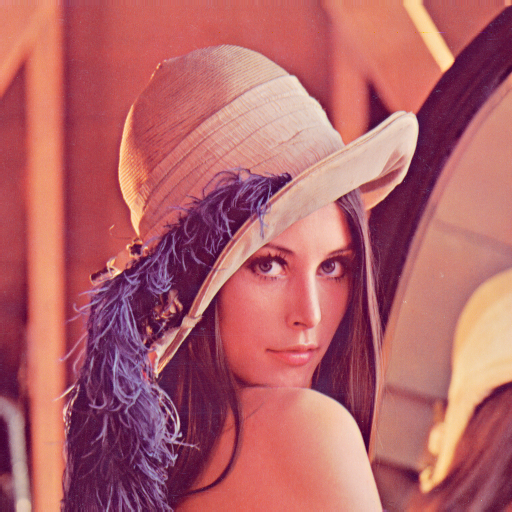

In [4]:
image = Image.open(requests.get('http://www.lenna.org/lena_std.tif', stream=True).raw)
# http://www.lenna.org/ Lenna 
image.save('images/lena_std.tif')
image

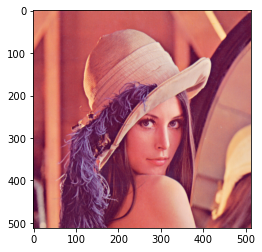

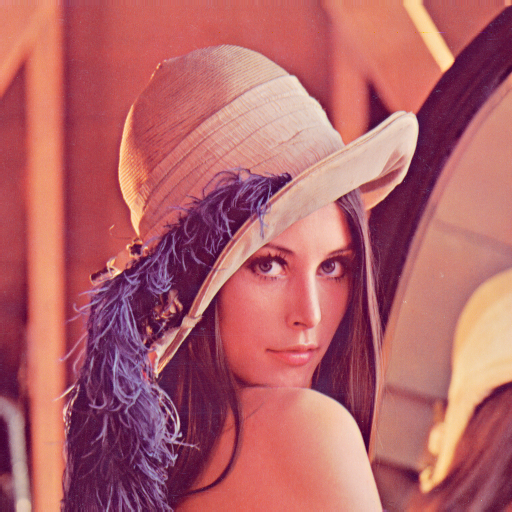

In [6]:
img = cv2.imread("images/lena_std.tif")
# arg1 : full path of the image
# arg2 [opt] : cv2.IMREAD_COLOR / 1 / cv2.IMREAD_UNCHANGED / -1 / cv2.IMREAD_GRAYSCALE / 0
# colour image excluding alpha channel [default] / including alpha channel / grayscale mode 

# OpenCV uses BGR image format. So, when we read an image using cv2.imread() it interprets in BGR format by default.
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# displaying image
# Matplotlib
plt.imshow(img_rgb)
plt.show()

# IPython
display(Image.fromarray(img_rgb))

# OpenCV
cv2.imshow('Original Image', img) #cv2.imshow(window name, image)
cv2.waitKey(0) # keyboard binding function take time in milliseconds as a delay for the window to close
cv2.destroyAllWindows() # destroy all created GUI window

In [7]:
height, width, channels = img.shape
height, width, channels

(512, 512, 3)

In [8]:
cv2.imwrite('images/Lenna.png', img) # save image
# cv2.imwrite(filename, image)

True

## Arithmetic Operations

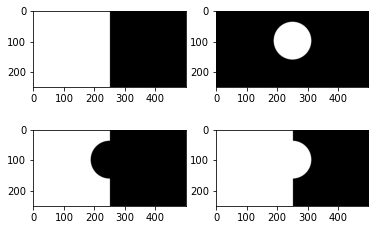

In [9]:
# cv2.addWeighted(image1, 0.5, image2, 0.4, 0)
# cv2.add(img1, img2) # adds up image pixels in the two images.
# cv2.subtract(src1, src2)
img1 = cv2.imread('images/1bit1.png')
plt.subplot(2, 2, 1)
plt.imshow(img1)
img2 = cv2.imread('images/2bit2.png')
plt.subplot(2, 2, 2)
plt.imshow(img2)

img3 = cv2.subtract(img1, img2)
plt.subplot(2, 2, 3)
plt.imshow(img3)

img4 = cv2.add(img1, img2)
plt.subplot(2, 2, 4)
plt.imshow(img4)

plt.show()

## Bitwise Operations

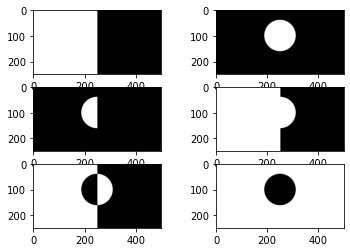

In [10]:
# cv2.bitwise_and(source1, source2, destination, mask)
img1 = cv2.imread('images/1bit1.png')
plt.subplot(3, 2, 1)
plt.imshow(img1)
img2 = cv2.imread('images/2bit2.png')
plt.subplot(3, 2, 2)
plt.imshow(img2)

img3 = cv2.bitwise_and(img2, img1, mask = None) # if both input is white only output white
plt.subplot(3, 2, 3)
plt.imshow(img3)

img4 = cv2.bitwise_or(img2, img1) # if one of the input is white then output white
plt.subplot(3, 2, 4) 
plt.imshow(img4)

img5 = cv2.bitwise_xor(img1, img2, mask = None) # if both input is white then output black
plt.subplot(3, 2, 5) 
plt.imshow(img5)

img6 = cv2.bitwise_not(img2, mask = None)
plt.subplot(3, 2, 6) 
plt.imshow(img6)

plt.show()
# cv2.bitwise_or(source1, source2, destination, mask)

## Color Mapping

- HSL (Hue Saturation Lightness)
- HSV (Hue Saturation Value)
- RGB (Red Green Blue)

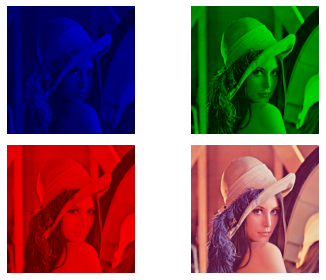

In [11]:
image = cv2.imread('images/Lenna.png') 

bgr = cv2.split(img) 
bgr.append(img)
# Corresponding channels are seperated

fig=plt.figure()
columns = 2
rows = 2

for i in range(1, columns*rows +1):
    img = img_rgb.copy()
    img[:,:,:] = 0
    if i == 4:
        img[:,:,:] = bgr[i-1]
    else:
        img[:,:,i-1] = bgr[i-1]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig.add_subplot(rows, columns, i)
    plt.axis("off")
    plt.imshow(img)
fig.tight_layout() 
plt.show()


## Thresholding Image 

### Simple Thresholding
A global threshold value is used throughout the image
- cv.THRESH_BINARY
- cv.THRESH_BINARY_INV
- cv.THRESH_TRUNC
- cv.THRESH_TOZERO
- cv.THRESH_TOZERO_INV

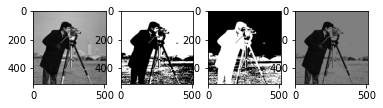

In [139]:
img = cv2.imread('images/cameraman.tif')
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
images = [img , thresh1, thresh2, thresh3]
for i in range(4):
    plt.subplot(1,4,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
plt.show()

### Adaptive Thresholding
The threshold value is calculated for smaller regions. 
This leads to different threshold values for different regions with respect to the change in lighting
- cv.ADAPTIVE_THRESH_MEAN_C: The threshold value is the mean of the neighbourhood area minus the constant C.
- cv.ADAPTIVE_THRESH_GAUSSIAN_C: The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C.


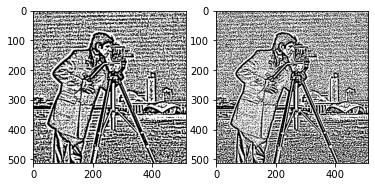

In [154]:
img = cv2.imread('images/cameraman.tif', 0)
th2 = cv2.adaptiveThreshold(img,maxValue=255,adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,thresholdType=cv2.THRESH_BINARY,blockSize=11,C=1)
plt.subplot(1,2,1)
plt.imshow(th2, cmap='gray')
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,1)
plt.subplot(1,2,2)
plt.imshow(th3, cmap='gray')

## Blending and Pasting  Image

(223, 226, 3)
(512, 512, 3)


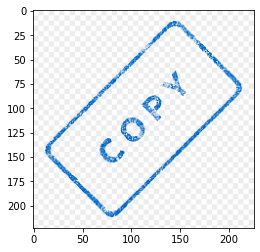

In [155]:
copy = cv2.imread('images/copy.png')
copy = cv2.cvtColor(copy, cv2.COLOR_BGR2RGB)
plt.imshow(copy)
print(copy.shape)
img1 = cv2.imread('images/lena_std.tif')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
print(img1.shape)
copy_resize = cv2.resize(copy, (512, 512))

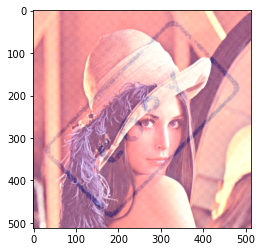

In [156]:
blended = cv2.addWeighted(src1=img1, alpha=0.9, src2=copy_resize, beta=0.3, gamma=0.8) # only for image with same size
plt.imshow(blended)

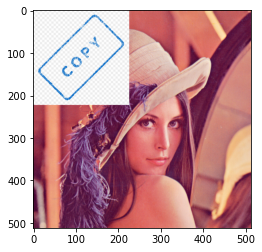

In [90]:
## OVERLAY SMALL IMAGE ON TOP  
img1[0:223, 0:226] = copy
plt.imshow(img1)

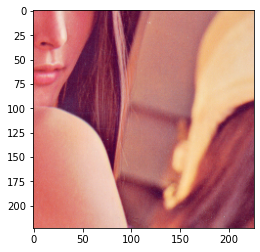

In [96]:
roi = img1[512-223:512, 512-226:512]
plt.imshow(roi)
copy_gray = cv2.cvtColor(copy, cv2.COLOR_RGB2GRAY)

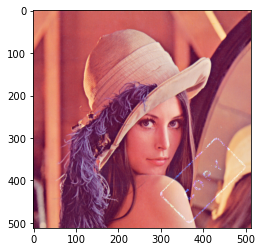

In [113]:
# plt.imshow(copy_gray, cmap='gray')
ret,thresh1 = cv2.threshold(copy_gray,127,255,cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(thresh1) # inverse the image
# plt.imshow(mask_inv, cmap='gray')

white_bg = np.full(copy.shape, 255, dtype=np.uint8) # make a white array with 3 channels
bk = cv2.bitwise_or(white_bg, white_bg, mask=mask_inv) # make the gray image to 3 channels
# plt.imshow(bk)

fg = cv2.bitwise_or(copy, copy, mask=mask_inv) # color mask in the white region
# plt.imshow(fg)

final_roi = cv2.bitwise_or(roi, fg) # copy the mask to the small image
# plt.imshow(final_roi)

img1[512-223:512, 512-226:512] = final_roi # copy the small image to the large image
plt.imshow(img1)

## Blurring and Smoothing / Denoising Images

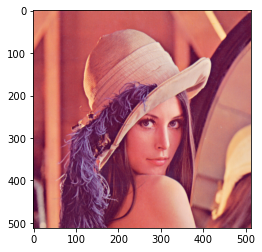

In [26]:
img = cv2.imread('images/lena_std.tif').astype(np.float32) / 255
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# print(img)
plt.imshow(img)

### Gamma Correction

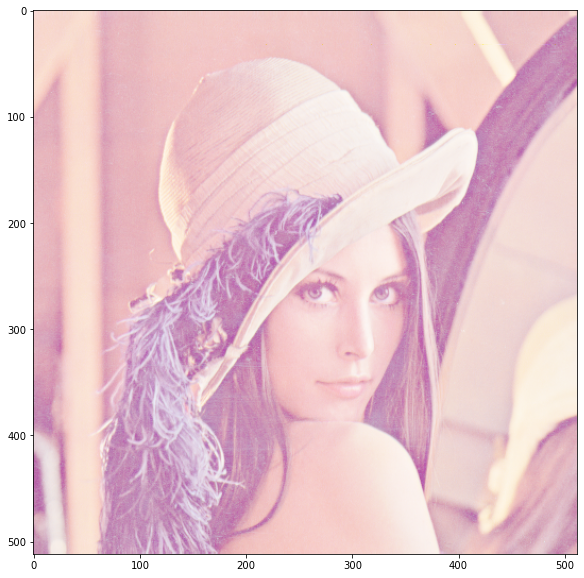

In [27]:
#gamma correction
gamma = 1/4 # [0:1.0]
result = np.power(img, gamma)
# print(result)
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.imshow(result)

- cv2.filter2D
- cv2.blur
- cv2.medianBlur
- cv2.bilateralFilter - Edge presercing denoising filter

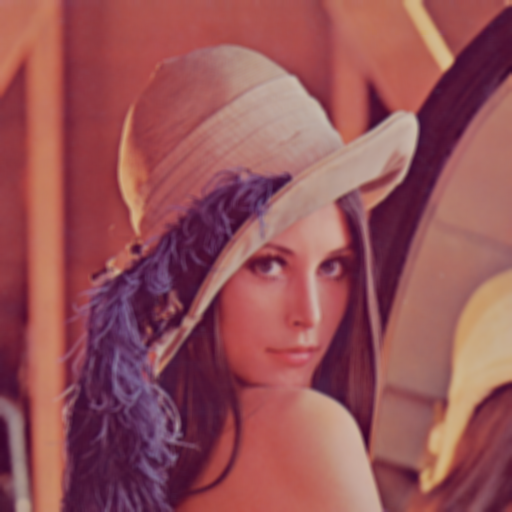

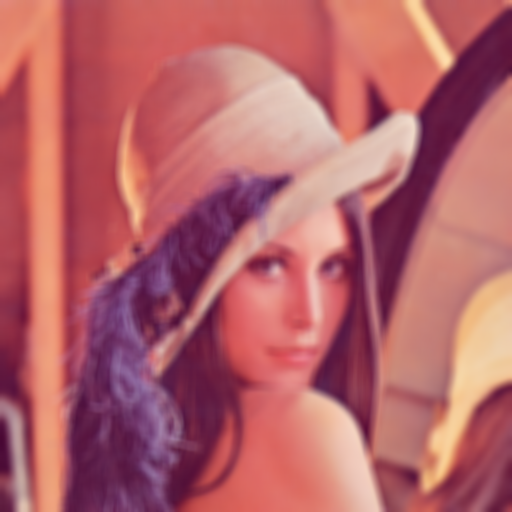

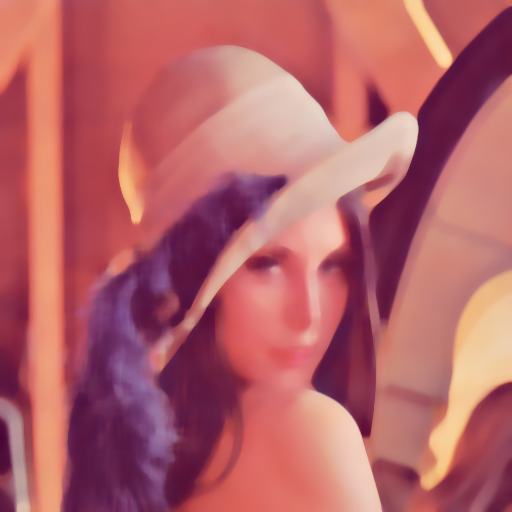

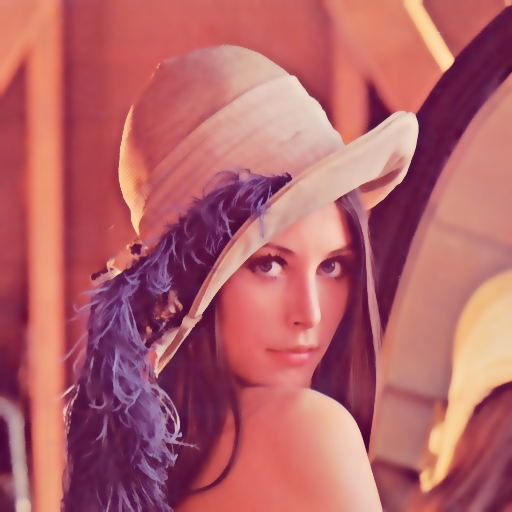

In [46]:
img_uint8 = (img*255).astype(np.uint8)

kernel1 = np.ones((5, 5), np.float32)/30
blur_img = cv2.filter2D(src=img_uint8, ddepth=-1, kernel=kernel1)
display(Image.fromarray(blur_img))

blur_img = cv2.blur(src=img_uint8, ksize=(10,10))
display(Image.fromarray(blur_img))


blur_img = cv2.medianBlur(src=img_uint8, ksize=15)
display(Image.fromarray(blur_img))

blur_img =  cv2.bilateralFilter(src=img_uint8, d=9, sigmaColor=75, sigmaSpace=75)
display(Image.fromarray(blur_img))

## Morphological Operations

- Erosion - Erodes away boundaries of foreground objects. Works best when foreground is light color (preferrably white) and background is dark.

- Opening - erosion + dilation Useful in removing background noise
- Closing - Useful in removing noise from foreground objects, such as black dots on top of the white text.
- Gradient - Difference between dilation and erosion of an image.

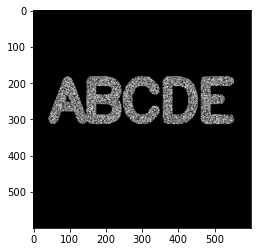

In [100]:
blank_img = np.zeros((600,600))
font = cv2.FONT_HERSHEY_SIMPLEX
img_text = cv2.putText(blank_img, text='ABCDE',org=(50,300), fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
# img_text = (img_text*255).astype(np.uint8)
plt.imshow(img_text, cmap='gray')    


white_noise = np.random.randint(low=0,high=2,size=(600,600))*255
noise_img = white_noise+img_text
plt.imshow(noise_img, cmap='gray')    


black_noise = np.random.randint(low=0,high=2,size=(600,600))*255
black_noise_img = np.maximum(0, img_text-black_noise)
plt.imshow(black_noise_img, cmap='gray')    

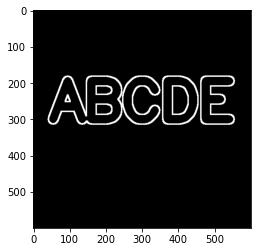

In [105]:


kernel1 = np.ones((5,5),np.uint8)
erosion1 = cv2.erode(src=noise_img, kernel=kernel1,iterations = 1)
plt.imshow(erosion1, cmap='gray') 

opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap='gray') 

closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing, cmap='gray') 

gradient = cv2.morphologyEx(img_text,cv2.MORPH_GRADIENT,kernel)
plt.imshow(gradient, cmap='gray') 


## Image Gradients 
### Sobel Operator


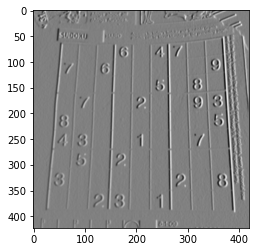

In [109]:
img = cv2.imread('images/sudoku-original.jpg', 0)
sobelx = cv2.Sobel(img, cv2.CV_64F, dx=1, dy=0, ksize=5)
plt.imshow(sobelx, cmap='gray')

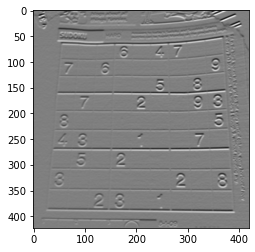

In [110]:
sobely = cv2.Sobel(img, cv2.CV_64F, dx=0, dy=1, ksize=5)
plt.imshow(sobely, cmap='gray')

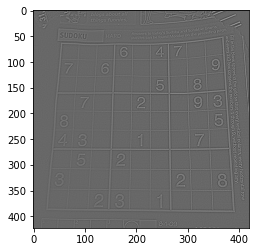

In [111]:
lapl = cv2.Laplacian(img, cv2.CV_64F)
plt.imshow(lapl, cmap='gray')

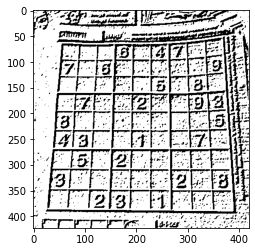

In [116]:
blended = cv2.addWeighted(src1=sobelx,alpha=0.5,src2=sobely,beta=0.5,gamma=0)
plt.imshow(blended, cmap='gray')

ret,th1 = cv2.threshold(blended,100,255,cv2.THRESH_BINARY_INV)
plt.imshow(th1, cmap='gray')

## Image Histogram

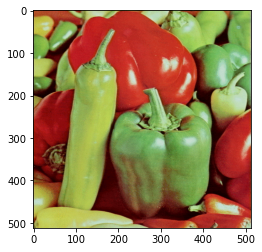

In [139]:
from matplotlib.colors import ListedColormap

img_pepper = cv2.imread('images/peppers_color.tif')
img_cameraman = cv2.imread('images/cameraman.tif')
img_pepper_rgb = cv2.cvtColor(img_pepper, cv2.COLOR_BGR2RGB)
plt.imshow(img_pepper_rgb)

hist_values = cv2.calcHist([img_pepper], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
# plt.plot(hist_values)


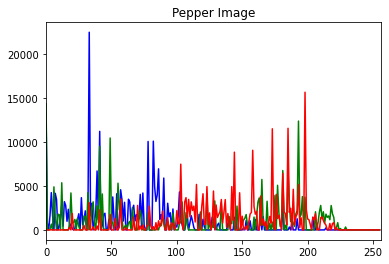

In [140]:
img = img_pepper
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Pepper Image')
plt.show()

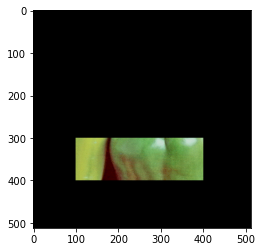

In [145]:
mask = np.zeros(img_pepper.shape[:2], np.uint8)
mask[300:400, 100:400] = 255
plt.imshow(mask,cmap='gray')

masked_img = cv2.bitwise_and(img_pepper,img_pepper,mask = mask)
show_masked_img = cv2.bitwise_and(img_pepper_rgb,img_pepper_rgb,mask = mask)
plt.imshow(show_masked_img)

histr = cv2.calcHist([img],[i],None,[256],[0,256])
hist_mask_values_red = cv2.calcHist([img_pepper],channels=[2],mask=mask,histSize=[256],ranges=[0,256])
hist_full_values_red = cv2.calcHist([img_pepper],channels=[2],mask=None,histSize=[256],ranges=[0,256])

Text(0.5, 1.0, 'Histogram for RED values for the Masked Area')

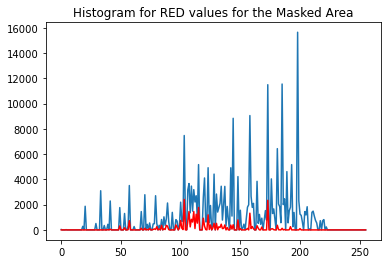

In [151]:
plt.plot(hist_full_values_red)
# plt.title('Histogram for RED values of the full image')

plt.plot(hist_mask_values_red,color='r')
plt.title('Histogram for RED values for the Masked Area and for full image')

## Histogram Equalization

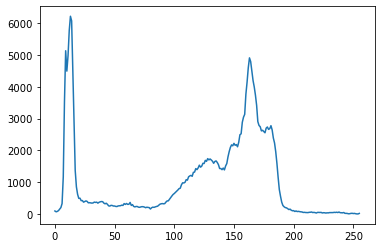

In [157]:
img_cameraman = cv2.imread('images/cameraman.tif', 0)
# img_cameraman = cv2.cvtColor(img_cameraman, cv2.COLOR_BGR2GRAY)
# print(img_cameraman)
hist_values = cv2.calcHist([img_cameraman],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values)

img_cameraman_eq = cv2.equalizeHist(img_cameraman)

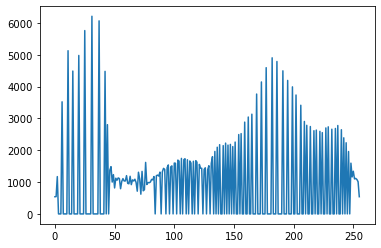

In [158]:
hist_values_eq = cv2.calcHist([img_cameraman_eq],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values_eq)

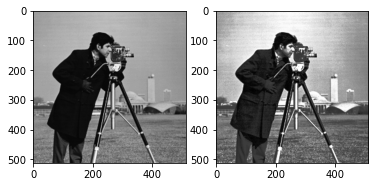

In [161]:
plt.subplot(1,2,1)
plt.imshow(img_cameraman, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_cameraman_eq, cmap='gray')

## Image Rotation

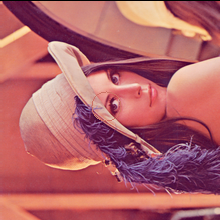

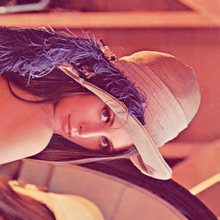

In [40]:
# cv2.getRotationMatrix2D(center, angle, scale) 
# https://docs.opencv.org/3.4/d4/d61/tutorial_warp_affine.html
rotationMatrix = cv2.getRotationMatrix2D((width//2, height//2), 90, 1)
# warp_rotate_dst = cv.warpAffine(src, M, (dsize))
rotatedImage = cv2.warpAffine(img, rotationMatrix, (width, height))
display(Image.fromarray(rotatedImage))

# Using cv2.rotate() method
# Using cv2.ROTATE_90_CLOCKWISE rotate by 90 degrees clockwise
rotated_image = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
display(Image.fromarray(rotated_image))

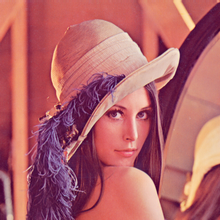

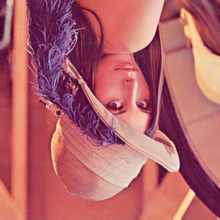

In [20]:
# cv2.flip(src, flipCode[, dst]) -> dst
# flip code: A flag to specify how to flip the array; 0 x-axis and 1 y-axis. -1 both axes.
display(Image.fromarray(img))
img_flip = cv2.flip(img, 0)
display(Image.fromarray(img_flip))

## Image Cropping

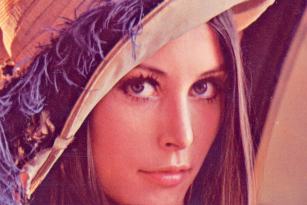

In [22]:
img = cv2.imread('images/lena_std.tif')


startRow = int(height*.35) 
startCol = int(width*.25) 
endRow = int(height*.75) 
endCol = int(width*.85)

cropped_img = img[startRow:endRow, startCol:endCol]
cv2.imwrite('images/lena_face.tif', cropped_img)
cropped_img = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
display(Image.fromarray(cropped_img))

## Image Resizing

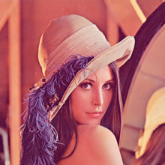

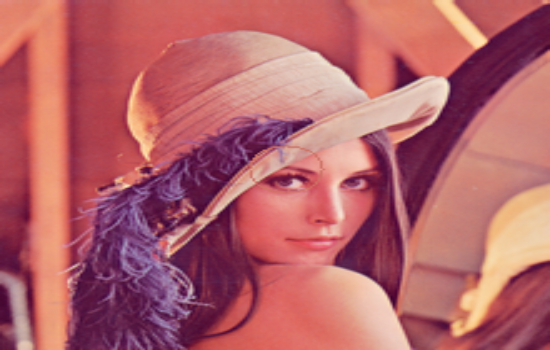

In [43]:
# cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) -> dst
# fx, fy is the scale factor

newImg = cv2.resize(img, (0,0), fx=0.75, fy=0.75) 
display(Image.fromarray(newImg))

newImg = cv2.resize(img, (550, 350)) 
display(Image.fromarray(newImg))

## Image Drawing and Writing 

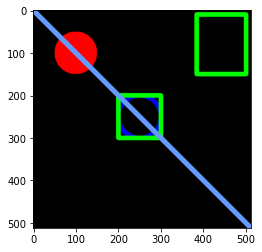

In [56]:
blank_img = np.zeros(shape=(512,512,3), dtype=np.int16)
plt.imshow(blank_img)
# rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) -> img
img_rect = cv2.rectangle(blank_img, pt1=(384, 10), pt2=(500, 150), color = (0, 255, 0), thickness=10)
# circle(img, center, radius, color[, thickness[, lineType[, shift]]]) -> img
img_circ = cv2.circle(blank_img, center=(250, 250), radius=50, color = (0, 0, 255), thickness=10)
img_circ = cv2.circle(blank_img, center=(100, 100), radius=50, color = (255, 0, 0), thickness=-1)

img_rect = cv2.rectangle(blank_img, pt1=(200, 200), pt2=(300, 300), color = (0, 255, 0), thickness=10)

img_line = cv2.line(blank_img, pt1=(0,0), pt2=(512,512), color=(101, 155, 255), thickness=10)
plt.imshow(blank_img)

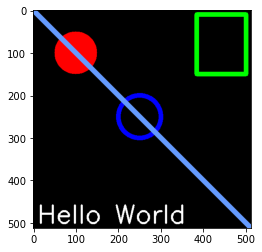

In [51]:
font = cv2.FONT_HERSHEY_SIMPLEX
img_text = cv2.putText(blank_img, text='Hello World', org=(10, 500), fontFace=font, fontScale=2, color=(255, 255, 255), thickness=3, lineType=cv2.LINE_AA)
plt.imshow(blank_img)

[[[100 300]]

 [[200 200]]

 [[400 300]]

 [[200 400]]]


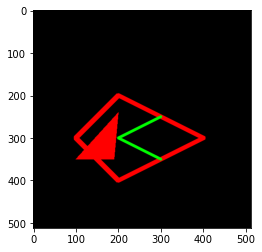

In [70]:
blank_img = np.zeros(shape=(512,512,3), dtype=np.int32)
vertices = np.array([[100,300],[200, 200],[400, 300],[200, 400]], dtype=np.int32)
pts = vertices.reshape((-1, 1, 2)) # Note: We can not pass -1 to more than one dimension.

vertices2 = np.array([[300,250],[200, 300],[300, 350]], dtype=np.int32)
pts2 = vertices2.reshape((-1, 1, 2))

print(pts)
img_poly = cv2.polylines(blank_img, [pts], isClosed=True, color=(255, 0, 0), thickness=10)
img_poly = cv2.polylines(blank_img, [pts2], isClosed=False, color=(0, 255, 0), thickness=5)

pts = np.array([[100,350],[190,350],[200,240]], np.int32)
img_poly = cv2.fillPoly(blank_img, [pts], color=(255, 0, 0))


plt.imshow(blank_img)

## Adjust Image Contrast

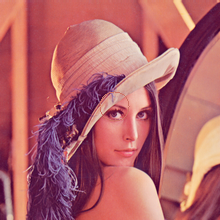

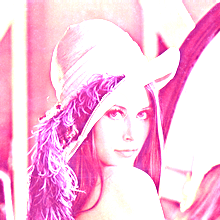

In [44]:
# new_img = a * original_img + b
# a : contrast of the image. If a > 1 : higher contrast. If 0 <= a < 1 : lower contrast. If a = 1 : no contrast.
# b vary from -127 to +127.
# cv2.addWeighted(source_img1, alpha1, source_img2, alpha2, beta)
# blend two images, the first source image (source_img1) with a weight of alpha1 and second source image (source_img2).

contrast_img = cv2.addWeighted(img, 2.5, np.zeros(img.shape, img.dtype), 0, 0)
display(Image.fromarray(img))
display(Image.fromarray(contrast_img))

## Detect Edges

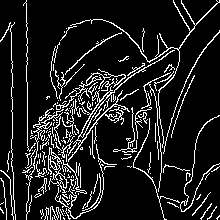

In [22]:
# cv2.Canny(image, minVal, maxVal)
# minimum and maximum intensity gradient values
edge_img = cv2.Canny(img,100,200)
display(Image.fromarray(edge_img))

## Convert image to grayscale (Black & White)

Color to Grayscale Conversion 
- average method 

R / 3 + G / 3 + B / 3
- weighted method / luminosity method
0.299R + 0.587G + 0.114B

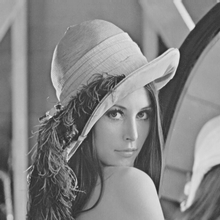

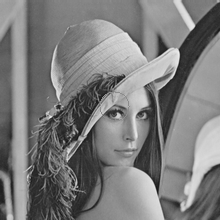

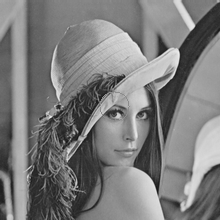

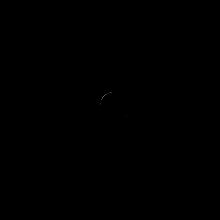

In [60]:
# imread grayscale result may differ to the output of cvtColor 

gray_img_1 = cv2.imread('images/Lenna.png', cv2.IMREAD_GRAYSCALE) # codec's internal grayscale conversion
display(Image.fromarray(gray_img_1))

gray_img_2 = cv2.imread('images/Lenna.png', cv2.IMREAD_COLOR)
gray_img_2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
display(Image.fromarray(gray_img_2))

gray_img_3 = cv2.imread('images/Lenna.png', cv2.IMREAD_UNCHANGED)
gray_img_3 = cv2.cvtColor(img, cv2.COLOR_RGBA2GRAY)
display(Image.fromarray(gray_img_3))

display(Image.fromarray(cv2.subtract(gray_img_3, gray_img_1)))

## Centroid (Center of blob) detection

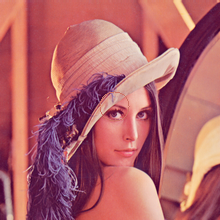

In [32]:
moment = cv2.moments(gray_img)
X = int(moment ["m10"] / moment["m00"])
Y = int(moment ["m01"] / moment["m00"])
cv2.circle(img, (X, Y), 15, (205, 114, 101), 1)
display(Image.fromarray(img))

## Apply a mask for a colored image

In [19]:
img1 = cv2.imread('images/Lenna.png')
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.medianBlur(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), 3)
circles = cv2.HoughCircles(gray_img, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=50, minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))

In [20]:
masking=np.full((img1.shape[0], img1.shape[1]),0,dtype=np.uint8)

for j in circles[0, :]:
    cv2.circle(masking, (j[0], j[1]), j[2], (255, 255, 255), -1)
    
final_img = cv2.bitwise_or(img1, img1, mask=masking)

In [21]:
cv2.imshow("Image", final_img)
cv2.waitKey(0)

-1

## Image Translation
`cv2.wrapAffine()`

In [ ]:
# Store height and width of the image 
height, width = img.shape[:2]   
quarter_height, quarter_width = height / 4, width / 4

T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]]) 
  
# We use warpAffine to transform the image using the matrix, T 
img_translation = cv2.warpAffine(img, T, (width, height)) 
cv2.imshow("Originalimage", img) 
plt.imshow(cv2.cvtColor(img_translation, cv2.COLOR_BGR2RGB) )
cv2.imshow('Translation', img_translation) 
cv2.waitKey() 
  
cv2.destroyAllWindows() 